In [1]:

import os
import sys
path = os.path.dirname(os.getcwd())
sys.path.insert(0, path)

from Codes.model import *
from Codes.utils import *

from scipy import stats
import pickle

RESULT_DIR = "../../DatasetsResult"
DATA_DIR = "../../Datasets"
DATAINFO_DIR = "../../DatasetsInfo"

import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets




In [2]:

iris = datasets.load_iris()
X = iris.data  
y = iris.target
df = pd.DataFrame(np.c_[X,y], columns = ['SepalL','SepalW','PetalL', 'PetalW', 'y'])
df_data = pd.DataFrame(X, columns = ['X1','X2','X3', 'Y'])
K = 3
f = 3



Clusterwise-Regression model with SVR - Constraint generation
# of outliers:  0
greedy objective:  0.06335515178272938
greedy objective:  0.0647488170547068
greedy objective:  0.1301383866423564
greedy objective:  0.12476530628322384
greedy objective:  0.1259403438818755
greedy objective kmlr:  0.12884999965653557
Max error for warm starting model:  0.3315745470213789
Number of WS constraints:  18
Set parameter Username

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2022-11-07
w at WS:  [[-0.51723003  0.4583688   0.6652088 ]
 [-0.01395039  0.0525444   0.34840528]
 [ 0.06174382  0.02093024  0.46801569]]
b at WS:  [[ 0.49127868]
 [-0.30705233]
 [-0.90937063]]
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.1
w:  [[-0.52374339  0.01282468  0.94159452]
 [ 0.21379179 -0.06775681  0.42475803]
 [ 0.24142313 -0.26429479  0.20076239]]
b:  [0.5751470110221337, -1.113352794441

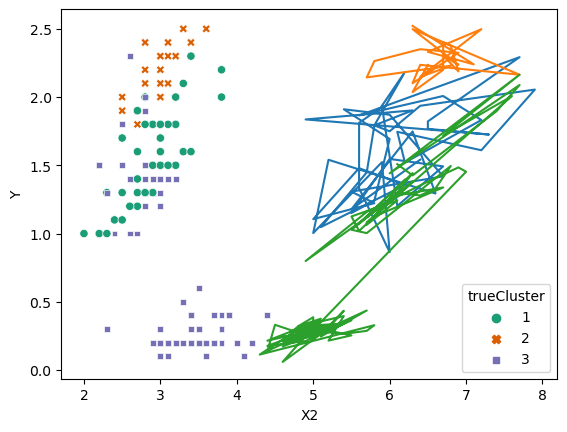

In [3]:

# Clusterwise SVR with constraint generation 

clus = CLR(K =K , f = f, max_iter= 10, compute = False, random_state=243)
clus.set_model(Cl_SVR_Cg(outputFlag=False, initConstrCnt=5, optimalGap= 0.1, tol = 0.1, time = 1, initConstrIntRatio= 4, outliersCnt = 0, step_plots=False))

clus.fit(df_data )

print(clus.weights)
print(clus.bias)
print("Run time: ", clus.run_time)
data = df_data.to_numpy()

X = data[:,0:f]
Y = data[:,f:f+1]

ax = sns.scatterplot( x="X2", y="Y", data=clus.data, hue='trueCluster', style = 'trueCluster', palette="Dark2", legend = "auto")
# ax = sns.lineplot( x="X", y="pred", data=clus.data, hue='model',markers=False, palette="Dark2", legend = "auto")
plt.scatter(X[clus.outliers], Y[clus.outliers], c='C04')
pred = getPrediction(X,K,clus.weights,clus.bias)

for k in range(K):
    plt.plot(X[clus.binary_assign[:,k]==1,0],pred[clus.binary_assign[:,k]==1,k])
plt.show()


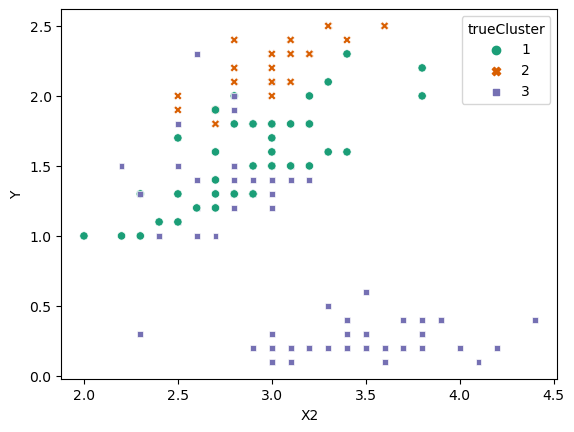

In [6]:

ax = sns.scatterplot( x="X2", y="Y", data=clus.data, hue='trueCluster', style = 'trueCluster', palette="Dark2", legend = "auto")
# ax = sns.lineplot( x="X", y="pred", data=clus.data, hue='model',markers=False, palette="Dark2", legend = "auto")
plt.scatter(X[clus.outliers], Y[clus.outliers], c='C04')
pred = getPrediction(X,K,clus.weights,clus.bias)

# for k in range(K):
#     plt.plot(X[clus.binary_assign[:,k]==1,1],pred[clus.binary_assign[:,k]==1,k])
plt.show()
